<a href="https://colab.research.google.com/github/mattbellis/earthshine/blob/main/bethe_block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np


In [4]:
def my_beta(mass,ke):

  etot = mass + ke
  p = np.sqrt(etot**2 - mass**2)

  beta = p/etot

  return beta
##########################################################

###############################################################
# We'll pass in the energy and mass in eV
#
# Everything else will be calculated in SI units, save for the
# density
###############################################################
def bethe_formula(ke, mass, Z=10, A=18, rho=1):
  
  m_e = 9.1e-31   # kg
  r_e = 2.8e-15 # meters
  c = 3e8         # m/s
  N_A = 6.022e23

  A *= 0.001 # Convert the atomic weight to kg

  z = 1     # electrons
  echarge = 1.6e-19

  # Let energy be in eV
  beta = my_beta(mass,ke)
  gamma = 1/np.sqrt(1-beta**2)
  
  I = 10 * Z * 1.6e-19

  term1 = 4*np.pi*N_A*(r_e**2)*m_e*(c**2)*(Z/A)*(z**2/beta**2)

  term2 = np.log((2*m_e*(c**2)*(beta**2)*(gamma**2))/I) - (beta**2)
  
  dedx = term1*term2
  
  dedx *= rho

  # dedx is in Joules/m so let's convert it to eV/m
  dedx /= 1.6e-19

  return dedx

For a muon with 1 GeV of kinetic energy in copper,   dE/dx is 1.51 MeV/mm
For a muon with 1 GeV of kinetic energy in aluminum, dE/dx is 0.51 MeV/mm
For a muon with 1 GeV of kinetic energy in water,    dE/dx is 0.22 MeV/mm
For a muon with 1 GeV of kinetic energy in Si02,    dE/dx is 0.36 MeV/mm


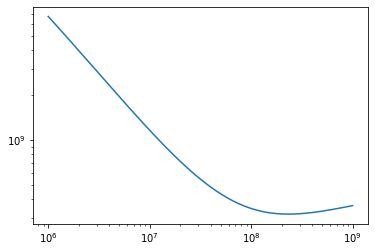

In [5]:
import sys
import matplotlib.pylab as plt
import numpy as np
#import earthshine_tools as etools

mass = 0.105e9 # Mass of muon in eV/c^2
ke = 1e9 # units of eV, so 1e9 eV = 1 GeV

# Copper
dedx = bethe_formula(ke,mass,Z=29,A=63,rho=9000)
print(f"For a muon with 1 GeV of kinetic energy in copper,   dE/dx is {dedx/1e6/1e3:.2f} MeV/mm")

# Aluminum
dedx = bethe_formula(ke,mass,Z=13,A=27,rho=2700)
print(f"For a muon with 1 GeV of kinetic energy in aluminum, dE/dx is {dedx/1e6/1e3:.2f} MeV/mm")

# Water
dedx = bethe_formula(ke,mass,Z=10,A=18,rho=1000)
print(f"For a muon with 1 GeV of kinetic energy in water,    dE/dx is {dedx/1e6/1e3:.2f} MeV/mm")

# SiO2, Si Z=14, O Z=8
dedx = bethe_formula(ke,mass,Z=30,A=60,rho=2000)
print(f"For a muon with 1 GeV of kinetic energy in Si02,    dE/dx is {dedx/1e6/1e3:.2f} MeV/mm")


# Make a plot
ke = np.linspace(1e6,1e9,10000)
dedx = bethe_formula(ke,mass,Z=30,A=60,rho=2000)

plt.plot(ke,dedx)
plt.xscale('log')
plt.yscale('log')



# You need this command when running from a script to get the plots to show up.
plt.show()


In [27]:
q=[]
ke=1e9
distance=[]
d=0

while ke>.001:
  dedx=bethe_formula(ke,mass, Z=30, A=60, rho=2000)
  dedx/=(1e6)
  ke-=dedx
  d+=.01 
  distance.append(d)
  #print(ke,dedx)
  q.append(ke)
  #print(f"energy lost: {dedx/1e6/1e2} MeV")
  #print(f"total energy: {ke/1e9} GeV")

  #Changed 100 GeV to 1 GeV because it was taking too long with 100

print(f"The distance a muon with an energy of 1 GeV can travel is {len(q)} cm")

The distance a muon with an energy of 1 GeV can travel is 2871717 cm


In [24]:
#print(f"the energy of a 1 GeV muon after travelling 1 meter is {q[99]} eV")
#print(f"the energy of a 1 GeV muon after travelling 2 meters is {q[199]} eV")
#print(f"the energy of a 1 GeV muon after travelling 10 meters is {q[999]} eV")
#print(f"the energy of a 1 GeV muon after travelling 20 meters is {q[1999]} eV")
#print(f"the energy of a 1 GeV muon after travelling 10000 meters is {q[999999]} eV")
#print(f"the energy of a 1 GeV muon after travelling 20000 meters is {q[1999999]} eV")

Text(0.5, 1.0, 'For 1 GeV muon')

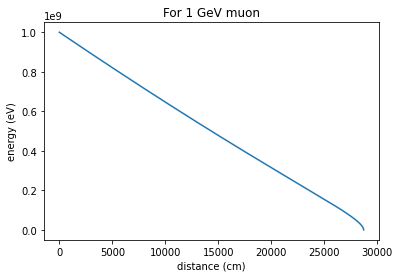

In [23]:
plt.plot(distance,q,markersize=5)
plt.xlabel("distance (cm)")
plt.ylabel("energy (eV)")
#plt.yscale("log")
#plt.xscale("log")
plt.title("For 1 GeV muon")